### 1. 데이터 확인

In [1]:
import pandas as pd

df = pd.read_csv('/content/sample_data/advertising_and_sales_clean.csv')

### 2. 기초 통계 및 분포

In [2]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83


In [3]:
df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [4]:
!apt-get -qq install -y fonts-nanum

import matplotlib.pyplot as plt

Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
import matplotlib.font_manager as fm
import logging

logging.getLogger('matplotlib').setLevel(logging.CRITICAL)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
kfont = fm.FontProperties(fname=font_path)
plt.rc('font', family=fm.FontProperties(fname=font_path).get_name())

In [6]:
import seaborn as sns

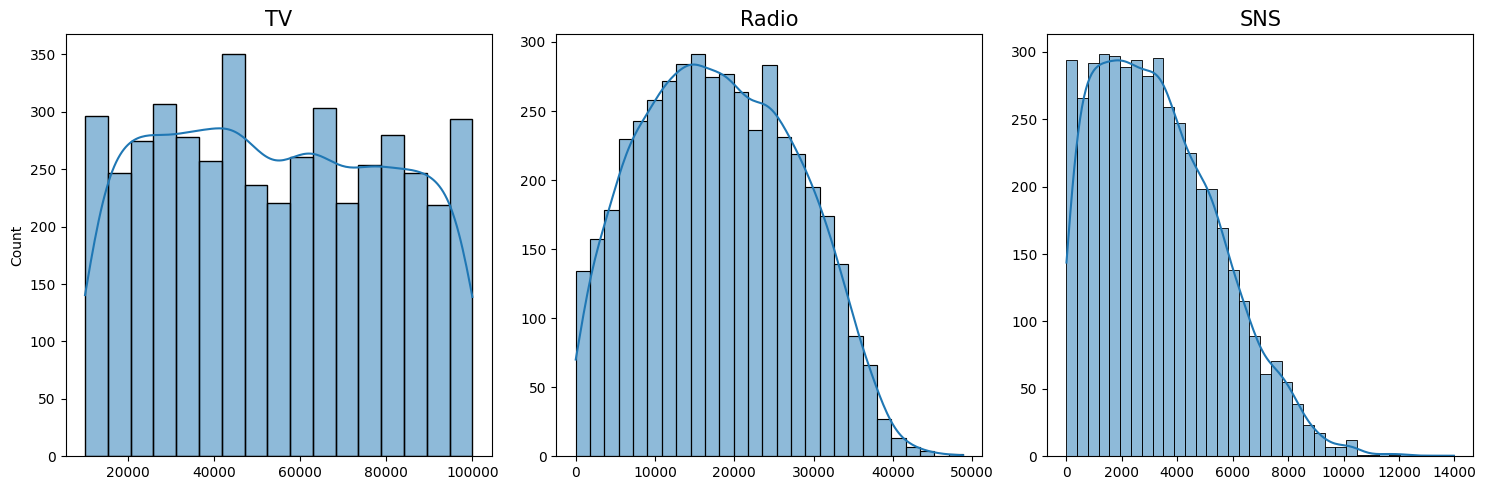

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df["tv"], kde=True, ax=axes[0])
axes[0].set_title("TV", fontsize=15)
axes[0].set(xlabel=None)

sns.histplot(df["radio"], kde=True, ax=axes[1])
axes[1].set_title("Radio", fontsize=15)
axes[1].set(xlabel=None, ylabel=None)

sns.histplot(df["social_media"], kde=True, ax=axes[2])
axes[2].set_title("SNS", fontsize=15)
axes[2].set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

### 3-1. 상관관계 분석

In [9]:
import numpy as np
df_corr = df.rename(columns={
    "tv": "TV",
    "radio": "Radio",
    "social_media": "SNS",
    "sales": "Sales"
})

corr = df_corr[["TV", "Radio", "SNS", "Sales"]].corr()
corr_annot = np.floor(corr * 100) / 100

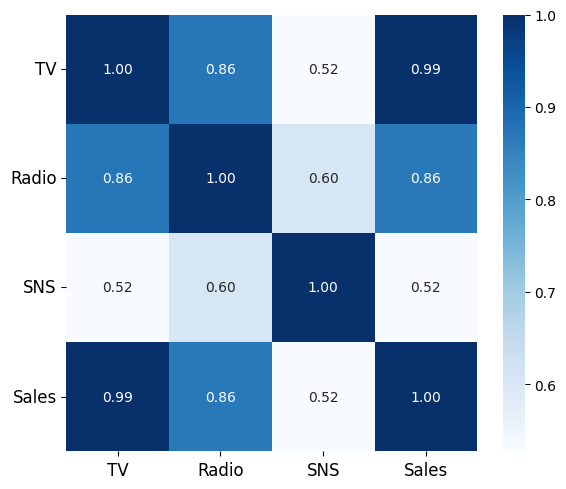

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=corr_annot, fmt=".2f", cmap="Blues",
            xticklabels=corr.columns, yticklabels=corr.columns)

plt.yticks(rotation=0, fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

### 3-2. 다중 회귀 분석

In [11]:
import statsmodels.api as sm

X_multi = df[["tv", "radio", "social_media"]]
y = df["sales"]
X_multi = sm.add_constant(X_multi)

model_multi = sm.OLS(y, X_multi).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        07:27:50   Log-Likelihood:                -42769.
No. Observations:                4546   AIC:                         8.555e+04
Df Residuals:                    4542   BIC:                         8.557e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -133.9630    102.820     -1.303      0.193    -335.541      67.615
tv               3.5626      0.003   1051.118      0.000       3.556       3.569
radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
social_media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[["tv", "radio", "social_media"]]

vif_data = pd.DataFrame()
vif_data["변수"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data

,변수,VIF
0,tv,18.565521
1,radio,21.142068
2,social_media,4.960585


### 4. 예측 모델 구축 및 평가

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[["tv", "radio", "social_media"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mae, mse, rmse, round(mape, 2)

(2342.1995624944116,
 8383569.736955786,
 np.float64(2895.43947216235),
 np.float64(1.72))

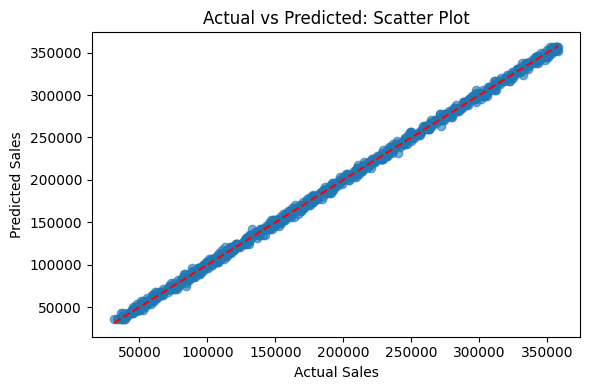

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted: Scatter Plot')
plt.tight_layout()
plt.show()

In [17]:
error_df = pd.DataFrame({
    "actual": y_test.values,
    "predicted": y_pred,
    "error": np.abs(y_test.values - y_pred)
})

error_df_sorted = error_df.sort_values(by="error", ascending=False).head(10)
error_df_sorted.reset_index(drop=True, inplace=True)

error_df_sorted

,actual,predicted,error
0,84624.06,74596.831132,10027.228868
1,133021.19,142314.576275,9293.386275
2,240271.68,231306.500714,8965.179286
3,297417.98,306301.247598,8883.267598
4,112814.79,120906.548121,8091.758121
5,271365.13,263467.929002,7897.200998
6,331867.17,323992.004540,7875.165460
7,248802.38,256352.511733,7550.131733
8,88804.02,96094.810192,7290.790192
9,163631.46,156555.796846,7075.663154


### 5. 예산 시나리오 분석

In [22]:
total_budget = 100000

ratios = [
    (0.7, 0.2, 0.1),
    (0.6, 0.3, 0.1),
    (0.5, 0.3, 0.2),
    (0.4, 0.4, 0.2),
    (0.33, 0.33, 0.34),
    (0.2, 0.4, 0.4),
    (0.1, 0.6, 0.3)
]

scenario_results = []
for tv_r, radio_r, sns_r in ratios:
    tv = total_budget * tv_r
    radio = total_budget * radio_r
    sns = total_budget * sns_r
    predicted_sales = model.predict([[tv, radio, sns]])[0]
    scenario_results.append({
        "TV 비율": tv_r,
        "라디오 비율": radio_r,
        "SNS 비율": sns_r,
        "예측 매출": round(predicted_sales, 2)
    })

df_scenarios = pd.DataFrame(scenario_results)
df_scenarios

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

,TV 비율,라디오 비율,SNS 비율,예측 매출
0,0.70,0.20,0.10,249341.42
1,0.60,0.30,0.10,213562.25
2,0.50,0.30,0.20,178081.49
3,0.40,0.40,0.20,142302.33
4,0.33,0.33,0.34,117674.68
5,0.20,0.40,0.40,71340.81
6,0.10,0.60,0.30,35263.25


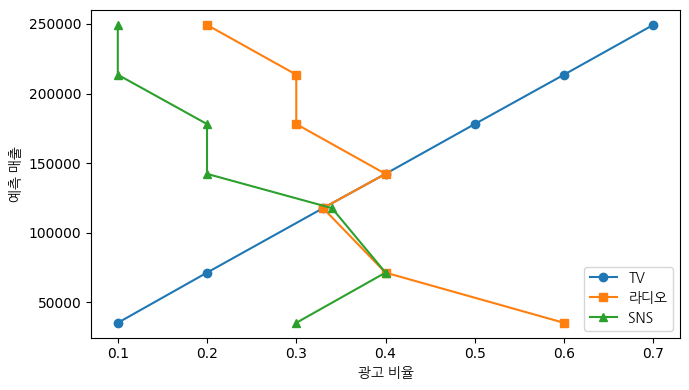

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(7, 4))
plt.plot(df_scenarios["TV 비율"], df_scenarios["예측 매출"], marker='o', label="TV")
plt.plot(df_scenarios["라디오 비율"], df_scenarios["예측 매출"], marker='s', label="라디오")
plt.plot(df_scenarios["SNS 비율"], df_scenarios["예측 매출"], marker='^', label="SNS")

plt.xlabel("광고 비율", fontproperties=kfont)
plt.ylabel("예측 매출", fontproperties=kfont)
plt.legend(prop=kfont)
plt.tight_layout()
plt.show()